In [209]:
import numpy as np
import pandas as pd
from keras import models
from keras import layers
from keras.optimizers import RMSprop

In [210]:
def load_spam_data(dataframe):
    dataframe = pd.read_csv(dataframe,delim_whitespace = False,header=None)
    dataframe = dataframe.replace("?",np.NAN)
    dataframe = dataframe.values
    not_spam, spam = np.split(dataframe, np.where(np.diff(dataframe[:,57]))[0]+1)
    train_ns_emails = not_spam[:1500]
    test_ns_emails = not_spam[1500:]
    train_s_emails = spam[:2500]
    test_s_emails = spam[2500:]
    train_data = np.vstack([train_ns_emails,train_s_emails])[:,:57]
    test_data = np.vstack([test_ns_emails,test_s_emails])[:,:57]
    train_labels = np.vstack([train_ns_emails,train_s_emails])[:,57]
    test_labels = np.vstack([test_ns_emails,test_s_emails])[:,57]
    return (train_data,train_labels),(test_data,test_labels)

In [211]:
(train_emails,train_labels),(test_emails,test_labels) = load_spam_data("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data")

In [212]:
print(train_emails.shape)
print(test_emails.shape)

(4000, 57)
(601, 57)


In [213]:
mean = train_emails.mean(axis = 0)
std = train_emails.std(axis=0)
train_emails = train_emails-mean
train_emails = train_emails/std
test_emails = test_emails-mean
test_emails = test_emails/std

In [254]:
x_val = train_emails[:500]
partial_x_train = train_emails[500:]

y_val = train_labels[:500]
partial_y_train = train_labels[500:]

In [267]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(train_emails.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=RMSprop(lr=0.001),loss="binary_crossentropy",metrics=["binary_accuracy"])

In [268]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=32,
                   validation_data=(x_val,y_val))

Train on 3500 samples, validate on 500 samples
Epoch 1/40
3500/3500 [==============================] - 0s 123us/step - loss: 0.4720 - binary_accuracy: 0.8023 - val_loss: 0.6675 - val_binary_accuracy: 0.6780
Epoch 2/40
3500/3500 [==============================] - 0s 67us/step - loss: 0.2600 - binary_accuracy: 0.9094 - val_loss: 0.4424 - val_binary_accuracy: 0.8220
Epoch 3/40
3500/3500 [==============================] - 0s 71us/step - loss: 0.1923 - binary_accuracy: 0.9326 - val_loss: 0.3871 - val_binary_accuracy: 0.8700
Epoch 4/40
3500/3500 [==============================] - 0s 68us/step - loss: 0.1616 - binary_accuracy: 0.9460 - val_loss: 0.4038 - val_binary_accuracy: 0.8800
Epoch 5/40
3500/3500 [==============================] - 0s 70us/step - loss: 0.1469 - binary_accuracy: 0.9506 - val_loss: 0.3956 - val_binary_accuracy: 0.8720
Epoch 6/40
3500/3500 [==============================] - 0s 67us/step - loss: 0.1381 - binary_accuracy: 0.9526 - val_loss: 0.3862 - val_binary_accuracy: 0.874

In [269]:
history_dict = history.history

In [270]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

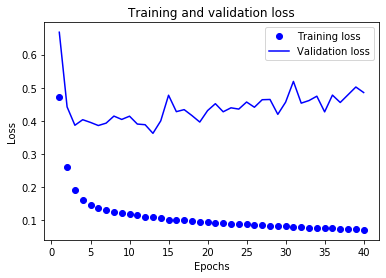

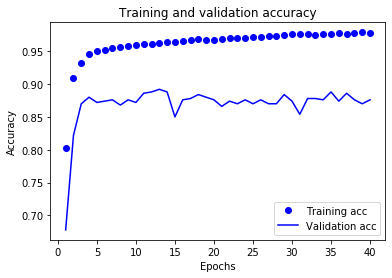

In [271]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [278]:
# Retrain the final model
model = models.Sequential() 
model.add(layers.Dense(16,activation='relu',input_shape=(train_emails.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(
    optimizer=RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["binary_accuracy"])

history = model.fit(train_emails,
                    train_labels,
                    epochs=30,
                    batch_size=512)
results = model.evaluate(test_emails,test_labels)
results

Epoch 1/30
4000/4000 [==============================] - 0s 46us/step - loss: 0.6334 - binary_accuracy: 0.6670
Epoch 2/30
4000/4000 [==============================] - 0s 6us/step - loss: 0.5623 - binary_accuracy: 0.7303
Epoch 3/30
4000/4000 [==============================] - 0s 6us/step - loss: 0.5100 - binary_accuracy: 0.7713
Epoch 4/30
4000/4000 [==============================] - 0s 6us/step - loss: 0.4635 - binary_accuracy: 0.8123
Epoch 5/30
4000/4000 [==============================] - 0s 6us/step - loss: 0.4223 - binary_accuracy: 0.8390
Epoch 6/30
4000/4000 [==============================] - 0s 6us/step - loss: 0.3858 - binary_accuracy: 0.8618
Epoch 7/30
4000/4000 [==============================] - 0s 7us/step - loss: 0.3539 - binary_accuracy: 0.8760
Epoch 8/30
4000/4000 [==============================] - 0s 7us/step - loss: 0.3259 - binary_accuracy: 0.8863
Epoch 9/30
4000/4000 [==============================] - 0s 7us/step - loss: 0.3010 - binary_accuracy: 0.9013
Epoch 10/30
4000/4

[0.4846474170164142, 0.860232949256897]

In [244]:
model.save('spam_classify.hdf5')

In [245]:
model.load_weights('spam_classify.hdf5')

In [246]:
model.predict(test_emails)

array([[9.98094320e-01],
       [9.99498606e-01],
       [9.87064540e-01],
       [8.48749280e-01],
       [3.54869127e-01],
       [9.95922446e-01],
       [3.90405953e-02],
       [9.55488920e-01],
       [7.77675748e-01],
       [9.88458633e-01],
       [9.97551322e-01],
       [1.66564733e-01],
       [9.99641418e-01],
       [9.81941462e-01],
       [8.89858484e-01],
       [9.92536426e-01],
       [4.24955666e-01],
       [2.09802032e-01],
       [9.29011106e-01],
       [5.43237209e-01],
       [6.47112548e-01],
       [2.74608433e-02],
       [1.97430968e-01],
       [9.95400071e-01],
       [6.47112548e-01],
       [9.03102994e-01],
       [7.39757359e-01],
       [9.93177712e-01],
       [9.81274486e-01],
       [9.88267124e-01],
       [8.73764396e-01],
       [9.54329371e-01],
       [1.00000000e+00],
       [1.66331649e-01],
       [9.95956659e-01],
       [6.52242780e-01],
       [9.88475859e-01],
       [6.52242780e-01],
       [9.57655668e-01],
       [9.99364734e-01],
